## Author: Igor Dzierwa
## Laboratory 4 - Implementation of a two-layer neural network using three different optimization methods: SGD, minibatch SGD, and GD for iris dataset.

This laboratory is almost the same as laboratory No. 3, except this time we will use **iris dataset** for training and testing the model and trying all three different optimization methods: 

- SGD
- minibatch
- GD

The architecture of our neural network is as follows:

- Input layer
- One hidden layer
- Output layer (one-hot encoding)
- Relu activation function for the hidden layer
- Softmax activation for the output layer

We have a dataset of different types of iris flower. This is a famous dataset containing 3 classes of 50 instances each. You are asked to write a neural network code to classify a sample in the correct class. So we have a classification task. Here is the link to the dataset:

- https://archive.ics.uci.edu/ml/datasets/iris

### Libraries import

In [2]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
import warnings

warnings.filterwarnings('ignore')

### Data import

**Iris Data Set attributes information:**

1. Sepal length [cm]
2. Sepal width [cm]
3. Petal length in [cm] 
4. Petal width in [cm]
5. Classes: 
- *Iris Setosa*
- *Iris Versicolour* 
- *Iris Virginica*

In [61]:
data = pd.read_csv("data/iris.data", sep=",")
data.head()

,5.1,3.5,1.4,0.2,Iris-setosa
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


In [62]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   5.1          149 non-null    float64
 1   3.5          149 non-null    float64
 2   1.4          149 non-null    float64
 3   0.2          149 non-null    float64
 4   Iris-setosa  149 non-null    object 
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


In [63]:
x = data.to_numpy()[:, :4].astype(float)
y = data.to_numpy()[:, 4]

### One-hot encoding

**One-hot encoding** - a method used to represent categorical data in a numerical format. It converts each category or class into a binary vector with a 1 in the position corresponding to the category and 0s in all other positions.

- `OneHotEncoder` - encodes categorical features as a one-hot numeric array.

In [64]:
print(y)

['Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versic

In [65]:
one_hot_encoder = OneHotEncoder()
one_hot_encoded = one_hot_encoder.fit_transform(y.reshape(-1, 1))
y = one_hot_encoded.toarray()

In [66]:
print(y)

[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0.

**Converted categorical data with one-hot encoding:**

- **Iris-setosa** - *[1. 0. 0.]*
- **Iris-setosa** - *[0. 1. 0.]*
- **Iris-setosa** - *[0. 0. 1.]*

### Split data to training and test set

- **Training set (80%)** - sample size: 119

- **Test set (20%)** - sample size: 30

In [67]:
x_train, x_test, y_train, y_test = train_test_split(
    x, 
    y, 
    test_size=0.2, 
    random_state=42
)

print ("Train x shape: ", x_train.shape)
print ("Train y shape: ", y_train.shape)

print ("\nTest x shape: ", x_test.shape)
print ("Test y shape: ", y_test.shape)

Train x shape:  (119, 4)
Train y shape:  (119, 3)

Test x shape:  (30, 4)
Test y shape:  (30, 3)


### ReLu activation function (hidden layer)

<div>
    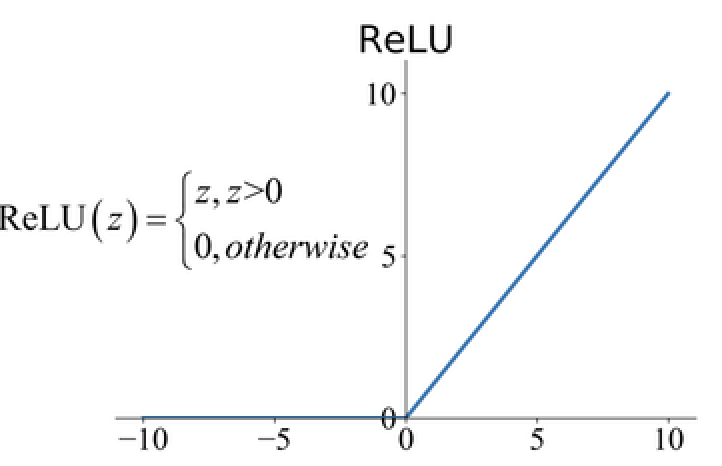
</div>


In [68]:
def relu(x):
    return np.maximum(0, x)

### Softmax activation function (output layer)

<div>
    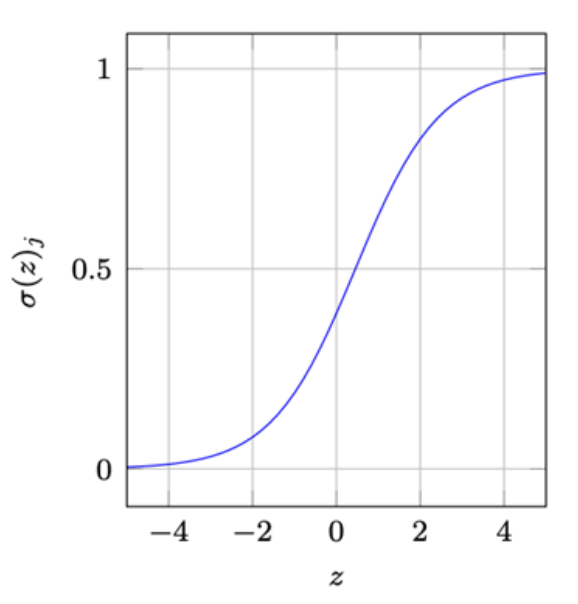
</div>

$$ softmax(z)_{i} = {e^{z_{i}} \over \sum_{j=1}^N e^{z_{j}}}  $$

In [69]:
def softmax(x):
    return np.exp(x) / np.sum(np.exp(x), axis=1, keepdims=True)

### Categorical Cross-Entropy loss function

$$ L = -\sum_{j=1}^{M}y_{j}\log(\hat{y}_{j}) $$

In [103]:
def cross_entropy_cost(prediction, output):
    return -np.sum(output * np.log(prediction))

### Xavier initialization technique

Approach is based on multiplying random initialization with the following scaling factor for the weights:

$$ {\sqrt{1} \over n} $$

In [76]:
mean = 0
sd = 5
hidden_neurons_count = 2
features_count = 3

np.random.normal(mean, sd, size=(hidden_neurons_count, features_count)) * np.sqrt(1 / features_count)

array([[ 5.90534739, -1.05130908, -1.62531726],
       [ 2.43347766, -2.53820855, -2.99458961]])

### Optimisation methods:
    
- **Gradient Descent** - entire training data is considered before taking a step in the direction of gradient.
- **Stochastic Gradient Descent** -  single training example is considered before taking a step in the direction of gradient.
- **Mini-Batch Gradient Descent** - subset of training examples is considered before taking a step in the direction of gradient.

### Neural Network implementation

In [81]:
class NeuralNetwork:
    def __init__(self, input_unit, hidden_unit, output_unit, learning_rate):
        self.input_unit = input_unit
        self.hidden_unit = hidden_unit
        self.output_unit = output_unit
        self.learning_rate = learning_rate
        
    def weights_biases_init(self, mean, sd):
        weights_1 = np.random.normal(mean, sd, size=(self.input_unit, self.hidden_unit))
        self.weights_1 = weights_1 * np.sqrt(1 / self.input_unit)
        self.bias_1 = np.zeros(self.hidden_unit)

        weights_2 = np.random.normal(mean, sd, size=(self.hidden_unit, self.output_unit))
        self.weights_2 =  weights_2 * np.sqrt(1 / self.input_unit)
        self.bias_2 = np.zeros(self.output_unit)
        
    def softmax(self, x):
        return np.exp(x) / np.sum(np.exp(x), axis=1, keepdims=True)
    
    def relu(self, x):
        return np.maximum(0, x)
    
    def relu_deriv(self, x):
        return 1 * (x > 0)
    
    def cross_entropy_cost(self, prediction, output):
        return -np.sum(output * np.log(prediction))
    
    def cross_entropy_cost_deriv(self, prediction, output):
        return prediction - output
    
    def params_update(self, gradients):
        self.weights_1 -= self.learning_rate * gradients['dW1']
        self.bias_1 -= self.learning_rate * gradients['db1']
        
        self.weights_2 -= self.learning_rate * gradients['dW2']
        self.bias_2 -= self.learning_rate * gradients['db2']
    
    def forward_propagation(self, inputs):
        z_1 = np.dot(inputs, self.weights_1) + self.bias_1
        a_1 = self.relu(z_1)
        
        z_2 = np.dot(a_1, self.weights_2) + self.bias_2
        a_2 = self.softmax(z_2)
        
        cache = {"Z1": z_1,"A1": a_1, "Z2": z_2, "A2": a_2}
    
        return a_2, cache
    
    def backward_propagation(self, cache, inputs, output):
        m = output.shape[1] #number of training example

        z_1 = cache['Z1']
        a_1 = cache['A1']
        a_2 = cache['A2']
        
        dZ2 = self.cross_entropy_cost_deriv(a_2, output)
        dW2 = (1/m) * np.dot(a_1.T, dZ2)
        db2 = (1/m) * np.sum(dZ2, axis=0)
        
        dZ1 = np.multiply(np.dot(dZ2, self.weights_2.T), self.relu_deriv(z_1))
        dW1 = (1/m) * np.dot(inputs.T, dZ1)
        db1 = (1/m) * np.sum(dZ1, axis=0)
        
        gradients = {"dW1": dW1, "db1": db1, "dW2": dW2, "db2": db2}

        return gradients

    def train_gd(self, inputs, output, num_iterations=1000):
        errors = []

        for i in range(num_iterations):
            prediction, cache = self.forward_propagation(inputs)
            cost = self.cross_entropy_cost(prediction, output)
            gradients = self.backward_propagation(cache, inputs, output)
            self.params_update(gradients)
            
            if i % 10 == 0:
                errors.append(cost)
                
        return errors
    
    def train_sgd(self, inputs, output, num_iterations=1000):
        errors = []
        
        for i in range(num_iterations):
            for j in range(inputs.shape[0]):
                prediction, cache = self.forward_propagation(inputs)
                gradients = self.backward_propagation(cache, inputs, output)
                self.params_update(gradients)
            
            cost = self.cross_entropy_cost(prediction, output)
            if i % 10 == 0:
                errors.append(cost)
                
        return errors
    
    def train_minibatch_gd(self, inputs, output, num_iterations=1000, batch_size=64):
        errors = []
        
        for epoch in range(num_iterations):
            shuffled_idxs = np.random.permutation(len(inputs))
            inputs, output = inputs[shuffled_idxs], output[shuffled_idxs]

            num_batches = len(inputs) // batch_size
            
            for i in range(num_batches):
                inputs_batch = inputs[i * batch_size : (i + 1) * batch_size]
                output_batch = output[i * batch_size : (i + 1) * batch_size]

                prediction, cache = self.forward_propagation(inputs_batch)
                gradients = self.backward_propagation(cache, inputs_batch, output_batch)
                self.params_update(gradients)
                
            cost = self.cross_entropy_cost(prediction, output_batch)
            if i % 10 == 0:
                errors.append(cost)
                
        return errors

    def predict(self, inputs):
        a_2, cache = self.forward_propagation(inputs)
        return a_2
    
    def accuracy(self, inputs, output):
        predictions = self.predict(inputs)
        accuracy = np.sum(np.argmax(predictions, axis=1) == np.argmax(output, axis=1)) / output.shape[0]
        return accuracy * 100

### Neural Network training

**Dataset:**
- Training sample size: 119
- Testing sample size: 30

**Experiment cases** - each one contains training *(training sample)*, loss curve and accuracy measurement *(test sample)*:
   1. Training using gradient descent optimisation technique.
   2. Training using stochastic gradient descent.
   3. Training using mini-batch gradient descent.
    
**Neural Network parameteres:**
- Xavier initialization - mean: 0, standard deviation: 5
- Categorical Cross-Entropy loss function
- Hidden layer neurons: 3
- Learning rate: 0.01
- Iterations *(epochs)* number: 1000
- Batch size: 64

### 1. Training using gradient descent optimisation technique

#### Training *(training sample)*

In [94]:
neural_network = NeuralNetwork(
    input_unit=x_test.shape[1], 
    hidden_unit=3, 
    output_unit=y_test.shape[1], 
    learning_rate=0.001
)

neural_network.weights_biases_init(mean=0, sd=5)

errors = neural_network.train_gd(inputs=x_train, output=y_train, num_iterations=1000)

#### Loss curve

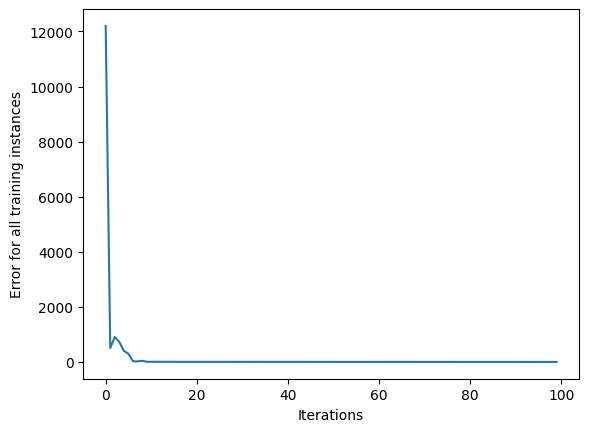

In [95]:
plt.plot(errors)
plt.xlabel("Iterations")
plt.ylabel("Error for all training instances")
plt.show()

#### Accuracy measurement *(test sample)*

In [96]:
neural_network.accuracy(x_test, y_test)

90.0

### 2. Training using stochastic gradient descent

#### Training *(training sample)*

In [97]:
neural_network = NeuralNetwork(
    input_unit=x_test.shape[1], 
    hidden_unit=3, 
    output_unit=y_test.shape[1], 
    learning_rate=0.001
)

neural_network.weights_biases_init(mean=0, sd=5)

errors = neural_network.train_sgd(inputs=x_train, output=y_train, num_iterations=1000)

#### Loss curve

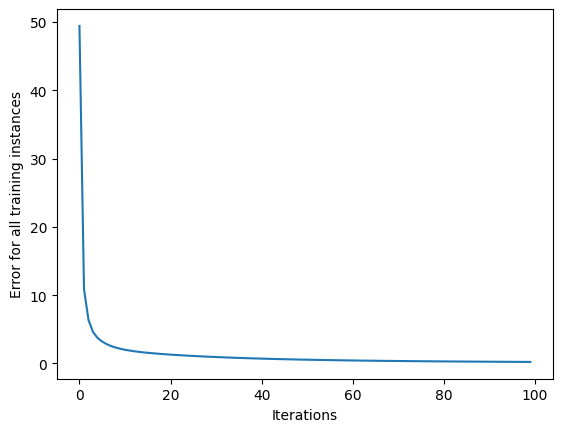

In [98]:
plt.plot(errors)
plt.xlabel("Iterations")
plt.ylabel("Error for all training instances")
plt.show()

#### Accuracy measurement *(test sample)*

In [99]:
neural_network.accuracy(x_test, y_test)

93.33333333333333

### 3. Training using mini-batch gradient descent

#### Training *(training sample)*

In [100]:
neural_network = NeuralNetwork(
    input_unit=x_test.shape[1], 
    hidden_unit=3, 
    output_unit=y_test.shape[1], 
    learning_rate=0.001
)

neural_network.weights_biases_init(mean=0, sd=5)

errors = neural_network.train_minibatch_gd(inputs=x_train, output=y_train, num_iterations=1000, batch_size=64)

#### Loss curve

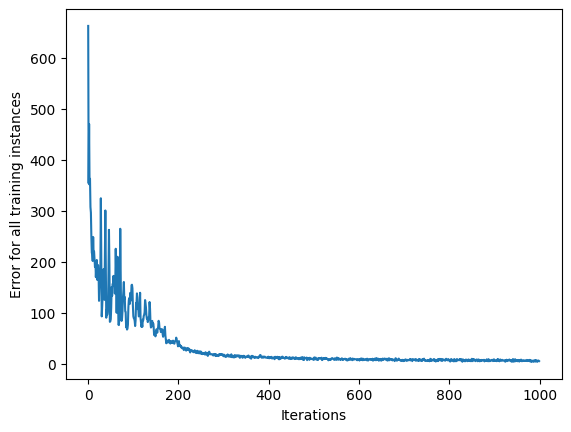

In [101]:
plt.plot(errors)
plt.xlabel("Iterations")
plt.ylabel("Error for all training instances")
plt.show()

#### Accuracy measurement *(test sample)*

In [102]:
neural_network.accuracy(x_test, y_test)

93.33333333333333

### Results:

1. **Training using gradient descent optimisation technique**
- Accuracy measurement: 90%
2. **Training using stochastic gradient descent**
- Accuracy measurement: 93.33%
3. **Training using mini-batch gradient descent**
- Accuracy measurement: 93.33%